In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 10, 10

In [2]:
img_id = "6070_2_3"

In [3]:
#################################################################
######################## RAW data prep  #########################
#################################################################

In [4]:
img = np.load("raw/%s_3band_in.npz" % img_id)["arr_0"]

In [5]:
img.shape

(3350, 3338, 3)

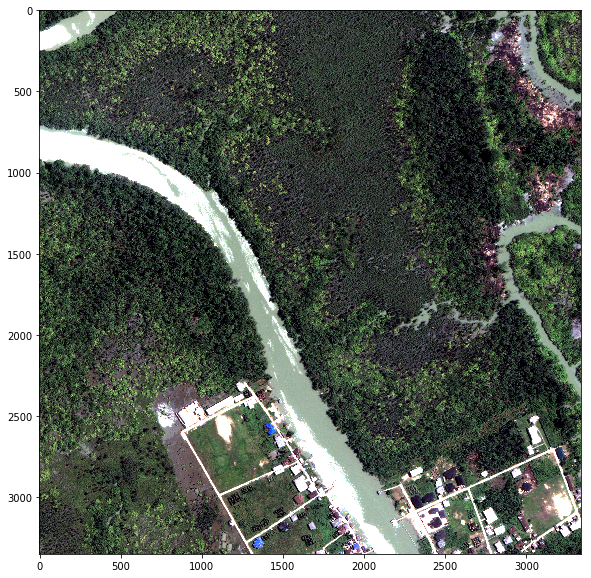

In [6]:
plt.imshow(img) 

In [7]:
img.shape

(3350, 3338, 3)

In [8]:
#        1 : 'Bldg',
#        2 : 'Struct',
#        3 : 'Road',
#        4 : 'Track',
#        5 : 'Trees',
#        6 : 'Crops',
#        7 : 'Fast H20',
#        8 : 'Slow H20',
#        9 : 'Truck',
#        10 : 'Car',            

In [9]:
mask = np.load("raw/%s_3band_chan5.npz" % img_id)["arr_0"]

In [10]:
mask.shape

(3350, 3338)

In [11]:
np.sum(mask)

1806114

In [12]:
np.sum(~mask)

9376186

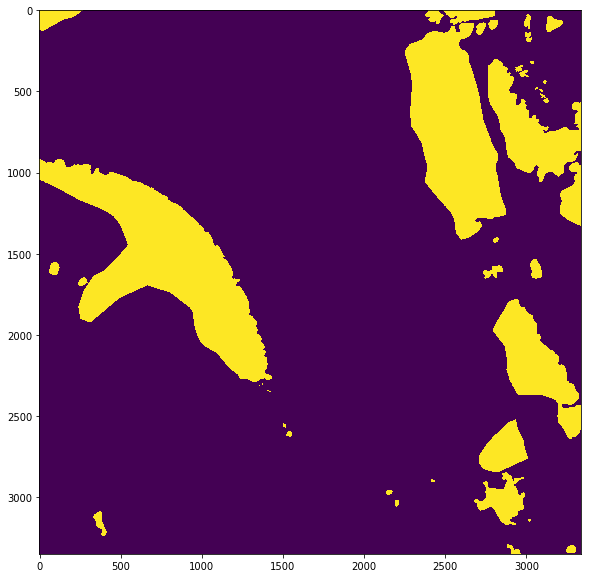

In [13]:
plt.imshow(mask) 

In [28]:
################################################################
#################### PREP patches CHECK ########################
################################################################

In [62]:
patch_size = 100

In [71]:
ipatch = np.load("prep/train_in_size%d.npy"  % (patch_size))
opatch = np.load("prep/train_out_size%d.npy" % (patch_size))

In [72]:
idx = 1

In [66]:
print np.amin(ipatch[idx]), np.amax(ipatch[idx])

-0.00389274578414 1.00390452413


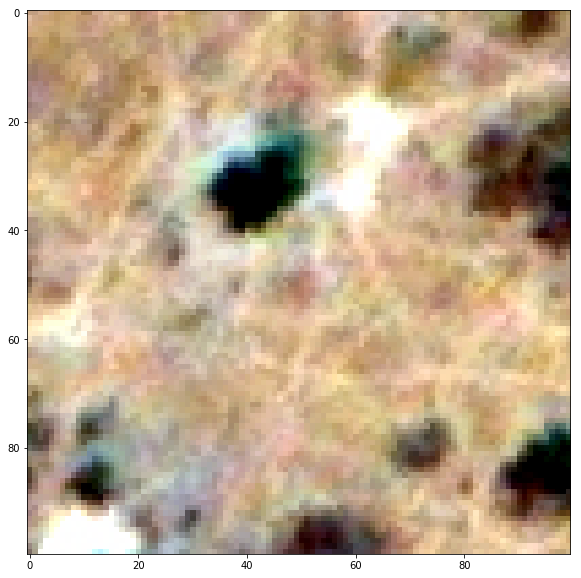

In [73]:
plt.imshow(np.clip(ipatch[idx],0.0,1.0))

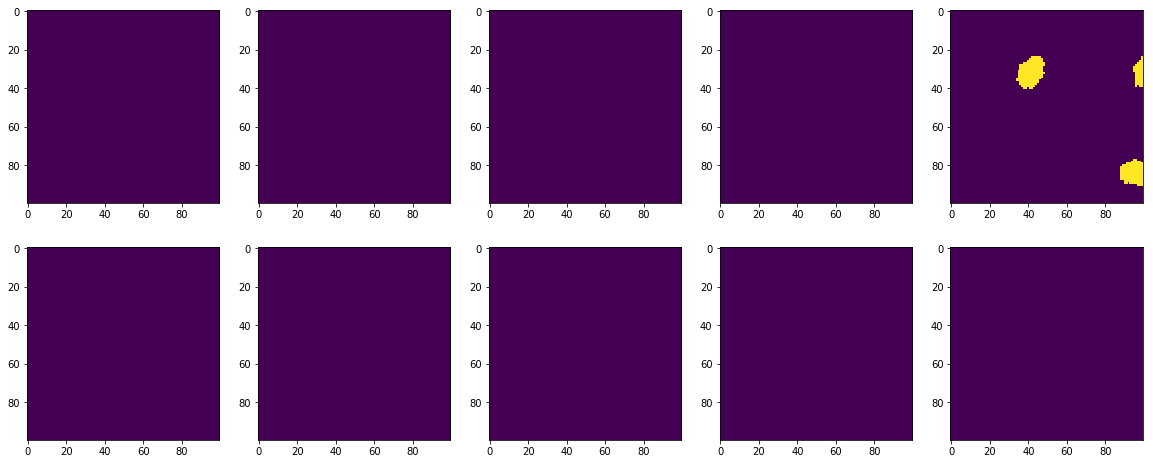

In [74]:
fig, axArr = plt.subplots(figsize=(20, 8), nrows=2, ncols=5)
for i in range(2):
    for j in range(5):
        chan = i*5+j
        if chan < 10:
            axArr[i][j].imshow(opatch[idx,:,:,chan])

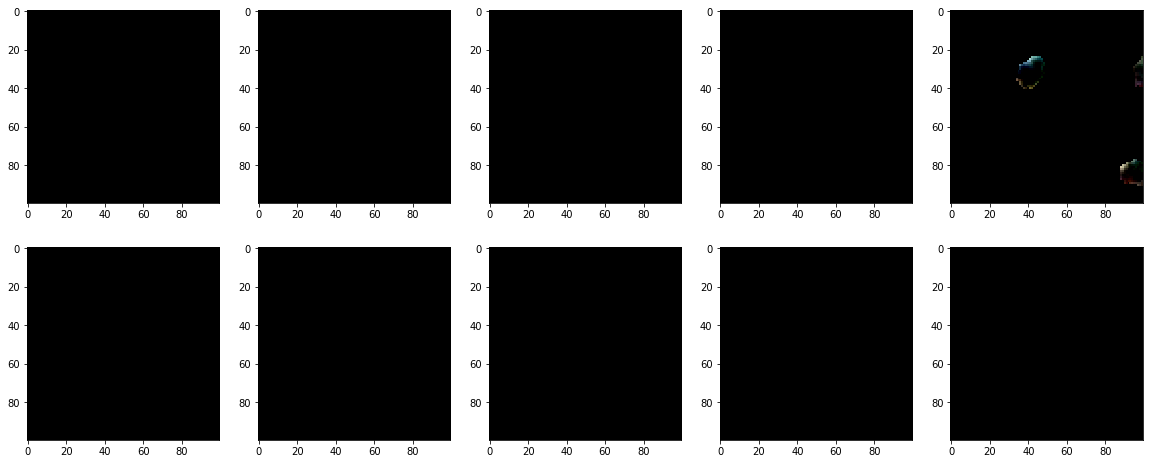

In [75]:
fig, axArr = plt.subplots(figsize=(20, 8), nrows=2, ncols=5)
for i in range(2):
    for j in range(5):
        chan = i*5+j
        if chan < 10:
            z = np.zeros(ipatch[idx].shape)
            for k in range(z.shape[2]):
                z[:,:,k] = ipatch[idx,:,:,k] * opatch[idx,:,:,chan]
            z = np.clip(z,0.0,1.0)
            axArr[i][j].imshow(z)

In [76]:
inecks = np.load("prep/train_necks_size%d.npy"  % (patch_size))
oroi   = np.load("prep/train_roi_size%d.npy" % (patch_size))

In [77]:
oroi

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [79]:
inecks.shape

(2, 2048)